Project 1
SVD


# ADDING LIBRARIES

In [48]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
from numpy import asarray

#Adding Image

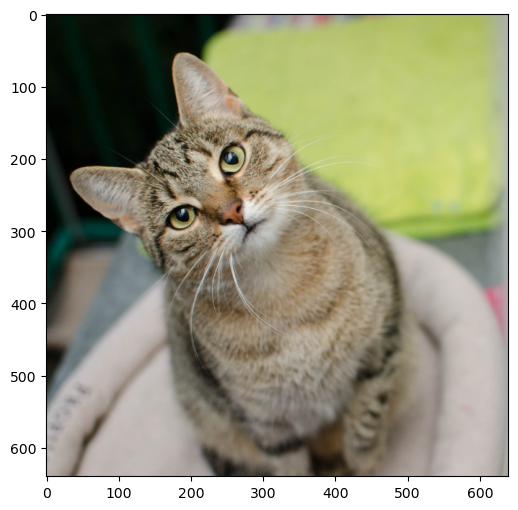

In [49]:
cat = imread('cat.png')
plt.figure(figsize=(6,6))
plt.axis('on')
plt.imshow(cat);

#Make it grayscale

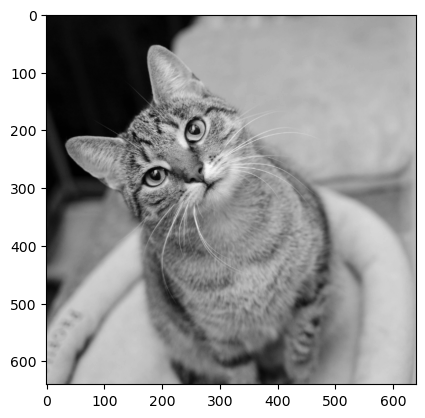

Image size: (640, 640)


In [50]:
X = np.mean(cat, -1)
cat_gray = plt.imshow(X, cmap='gray') #cat_gray is output of imshow()
plt.axis('on')
plt.imsave('cat_gray.png', X, cmap='gray' )
plt.show()

# Get the size of the image array
image_size = X.shape
print("Image size:", image_size)

#Convert image to matrix

In [51]:
catMat = asarray(X) #we cannot use cat_gray because it is output of imshow()
print(catMat) 

[[0.2784314  0.2784314  0.2784314  ... 0.7588235  0.7607843  0.7637255 ]
 [0.2764706  0.27745098 0.27745098 ... 0.7588235  0.7607843  0.7637255 ]
 [0.2735294  0.2764706  0.2784314  ... 0.76176476 0.7637255  0.7637255 ]
 ...
 [0.78137255 0.7784314  0.7754902  ... 0.74509805 0.73627454 0.7313726 ]
 [0.7784314  0.7754902  0.77254903 ... 0.74215686 0.73529416 0.7313726 ]
 [0.78137255 0.7754902  0.76960784 ... 0.7372549  0.7294118  0.7264706 ]]


#STEP 1: Partiton the host image into blocks

In [52]:
block_size = 32
rows, columns = catMat.shape #height = rows, width = columns
blocks = []

for r in range(0, X.shape[0], block_size):
    for c in range(0, X.shape[1], block_size):
        block = catMat[r: r+block_size, c: c+block_size]
        blocks.append(block)

print("Total block: ", len(blocks))


Total block:  400


#STEP 2: Perform SVD Transformation

In [53]:
def power_iteration(A, max_iter=1000, tol=1e-10):
    m, n = A.shape
    x = np.random.rand(n)

    #x1 = A x
    for i in range(max_iter):
        x_new = np.dot(A, x)
        x_new_mag = np.sqrt(np.dot(x_new, x_new))
        x_new /= x_new_mag
        
        if np.abs(np.dot(x, x_new)) > 1 - tol:
            break
        
        x = x_new
    
    # Compute the eigenvalue
    eigval = np.dot(x, np.dot(A, x)) / np.dot(x, x)
    #print("Eigenvector x:", x)    
    return eigval, x

# Example usage:
# U, sigma, Vt = svd_custom(block)

def svd(A, max_iter=1000, tol=1e-10):
    m, n = A.shape

    # Compute A^T * A and A * A^T
    ATA = np.dot(A.T, A)
    AAT = np.dot(A, A.T)

    # Compute eigenvalues and eigenvectors of A^T * A
    eigvals_ATA, V = power_iteration(ATA, max_iter, tol)

    # Compute singular values and U from eigenvectors of A^T * A
    sigma = np.sqrt(eigvals_ATA)
    U = np.dot(A, V / sigma)

    # Compute Vt from eigenvectors of A * A^T
    eigvals_AAT, Vt = power_iteration(AAT, max_iter, tol)
    
    # Sort singular values and corresponding singular vectors
    sorted_indices = np.argsort(sigma)[::-1]
    #print("Sorted indices:", sorted_indices)
    #print("Shape of sigma before sorting:", sigma.shape)
    sigma = sigma[sorted_indices]
    #print("Shape of sigma after sorting:", sigma.shape)

    U = U[:, sorted_indices]
    Vt = Vt.T[:, sorted_indices]

    return U, sigma, Vt
print("Total block: ", len(blocks))

# Test the svd function
# Generate a random matrix
np.random.seed(0)
A = np.random.rand(3, 3)

# Perform SVD
U, s, Vt = svd(A)

Total block:  400


IndexError: invalid index to scalar variable.